<a href="https://colab.research.google.com/github/ramirezjc/2024-fall-main/blob/master/266_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Verify Access to PDFs

In [2]:
import os

# Path to the FORUM folder on Google Drive
folder_path = '/content/drive/My Drive/FORUM'
files = os.listdir(folder_path)
print(files)


['forum_fall24.pdf', 'forum_summer2024.pdf', 'forum_spring2024.pdf', 'forum_winter2024.pdf', 'Forum_summer2023.pdf', 'Forum_Spring2023.pdf', 'Forum_Winter2023.pdf', 'Forum_fall2022.pdf', 'Forum_summer2022.pdf', 'Forum_spring2022.pdf', 'Forum_winter2021.pdf', 'Forum_fall2021.pdf', 'Forum_summer2021.pdf', 'Forum_Spring2021.pdf', 'Forum_fall2020.pdf', 'Forum_summer2020.pdf', 'Forum_Spring2020.pdf', 'Forum_Fall2019.pdf', 'Forum_Summer2019.pdf', 'Forum_Spring2019.pdf', 'Forum_winter2018.pdf', 'Forum_summer2018.pdf', 'Forum_spring2018.pdf', 'Forum_fall2017.pdf', 'Forum_Summer2017.pdf', 'forum_spring_17.pdf', 'forum_fall_16.pdf', 'forum_summer_16.pdf', 'forum-spring2016.pdf', 'forum11_15.pdf', 'forum08_15.pdf', 'forum05_15.pdf', 'forum10_14.pdf', 'forum08_14.pdf', 'forum05_14.pdf', 'forum10_13.pdf', 'forum07_13.pdf', 'forum04_13.pdf', 'forum10_12.pdf', 'forum08_12.pdf', 'forum05_12.pdf', 'forum11_11.pdf', 'forum08_11.pdf', 'forum05_11.pdf', 'forum10_10.pdf', 'forum08_10.pdf', 'forum05_10.pdf'

Install and Import Libraries

In [3]:
!pip install PyPDF2
!pip install nltk
import PyPDF2
import nltk
nltk.download('all')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.7 MB/s eta 0:00:00


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

Extract Text from PDFs

In [5]:
def extract_text_from_pdf(file_path):
    text = ''
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            text += page.extract_text() if page.extract_text() else ''
    return text

# Loop through each file and extract text
all_texts = []
for file_name in files:
    # Check if the file is a PDF file before processing it
    if file_name.lower().endswith('.pdf'):  # Only process files ending with .pdf
        file_path = os.path.join(folder_path, file_name)
        file_text = extract_text_from_pdf(file_path)
        all_texts.append(file_text)


Preprocess Text

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Keep alphabetic words only
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Stem words
    return tokens

processed_texts = [preprocess_text(text) for text in all_texts]


Topic Modeling

In [7]:
!pip install gensim
from gensim import corpora, models

# Create a dictionary and corpus for topic modeling
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Apply LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)


(0, '0.015*"va" + 0.014*"care" + 0.011*"research" + 0.010*"servic"')
(1, '0.021*"veteran" + 0.019*"va" + 0.018*"care" + 0.014*"health"')
(2, '0.019*"use" + 0.012*"patient" + 0.010*"percent" + 0.008*"safeti"')
(3, '0.016*"ptsd" + 0.004*"sud" + 0.003*"symptom" + 0.003*"traumat"')
(4, '0.023*"care" + 0.021*"va" + 0.020*"veteran" + 0.017*"health"')
(5, '0.034*"data" + 0.013*"big" + 0.010*"research" + 0.009*"health"')
(6, '0.016*"research" + 0.015*"va" + 0.011*"health" + 0.010*"hsr"')
(7, '0.000*"care" + 0.000*"va" + 0.000*"veteran" + 0.000*"health"')
(8, '0.037*"veteran" + 0.026*"va" + 0.022*"care" + 0.016*"homeless"')
(9, '0.034*"care" + 0.021*"health" + 0.020*"va" + 0.018*"patient"')


In [9]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score:', coherence_lda)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score: 0.34500344300475627


Analyze and Visualize Results

In [8]:
!pip install pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.8 MB/s eta 0:00:00


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.160158  0.019198       1        1  39.578239
9     -0.160318 -0.022198       2        1  32.377555
1     -0.126039  0.003480       3        1  11.511008
6     -0.047065 -0.035713       4        1   7.000477
8     -0.076384 -0.002824       5        1   3.181550
0     -0.006972 -0.083864       6        1   2.749265
2      0.013882  0.149268       7        1   2.549162
5      0.073673 -0.012173       8        1   0.777229
3      0.231675 -0.008030       9        1   0.272900
7      0.257706 -0.007145      10        1   0.002615, topic_info=           Term         Freq        Total Category  logprob  loglift
1289    veteran  4640.000000  4640.000000  Default  30.0000  30.0000
1273         va  5744.000000  5744.000000  Default  29.0000  29.0000
282        data   959.000000   959.000000  Default  28.0000  28.0000
166        care  7141.000000  7141.000000  Default  27.0000  27.0000
1017   research  3780.000000  3780.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
834      outcom     0.000769   765.091990  Topic10  -9.2129  -3.2591
527   healthcar     0.000781   921.800262  Topic10  -9.1967  -3.4292
1674     measur     0.000772   915.449535  Topic10  -9.2081  -3.4337
579      includ     0.000780  1055.593270  Topic10  -9.1982  -3.5663
221      commun     0.000772  1013.324412  Topic10  -9.2083  -3.5355

[798 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2773      4  0.957807    abet
7         1  0.451911  access
7         2  0.431611  access
7         3  0.052958  access
7         4  0.012357  access
...     ...       ...     ...
1341      5  0.023788    year
1341      6  0.022301    year
1341      7  0.022301    year
1341      8  0.001487    year
3685      5  0.648284    yend

[1698 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 10, 2, 7, 9, 1, 3, 6, 4, 8])

Link Trends to Spefic Years

In [10]:
import re

# Extract Date from Filename
def extract_date_from_filename(filename):
    # This regex assumes the format always ends with year as in your files (e.g., 2022)
    match = re.search(r'\d{4}', filename)
    if match:
        return match.group()
    return None

# Create a list of tuples (year, text)
texts_with_dates = [(extract_date_from_filename(file), text) for file, text in zip(files, all_texts)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Aggregate Texts by Year

In [11]:
from collections import defaultdict

# Aggregate texts by year
texts_by_year = defaultdict(list)
for year, text in texts_with_dates:
    texts_by_year[year].append(text)

# Concatenate texts of the same year
concatenated_texts_by_year = {year: ' '.join(texts) for year, texts in texts_by_year.items()}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Process and Model Each Year's Text

In [12]:
processed_texts_by_year = {year: preprocess_text(text) for year, text in concatenated_texts_by_year.items()}

# Create dictionary and corpus for each year, and apply LDA model
lda_models_by_year = {}
for year, texts in processed_texts_by_year.items():
    dictionary = corpora.Dictionary([texts])
    corpus = [dictionary.doc2bow(texts)]
    lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
    lda_models_by_year[year] = lda_model


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analyze Topic Changes Over Time

In [13]:
for year, model in lda_models_by_year.items():
    print(f"Year: {year}")
    topics = model.print_topics(num_words=4)
    for topic in topics:
        print(topic)


Year: None
(0, '0.001*"care" + 0.000*"research" + 0.000*"va" + 0.000*"health"')
(1, '0.000*"care" + 0.000*"va" + 0.000*"health" + 0.000*"research"')
(2, '0.027*"care" + 0.020*"va" + 0.019*"health" + 0.015*"research"')
(3, '0.001*"care" + 0.001*"health" + 0.000*"veteran" + 0.000*"va"')
(4, '0.000*"care" + 0.000*"health" + 0.000*"va" + 0.000*"patient"')
Year: 2024
(0, '0.001*"veteran" + 0.001*"va" + 0.001*"homeless" + 0.001*"research"')
(1, '0.002*"veteran" + 0.001*"homeless" + 0.001*"suicid" + 0.001*"va"')
(2, '0.028*"veteran" + 0.015*"va" + 0.013*"homeless" + 0.013*"suicid"')
(3, '0.001*"veteran" + 0.001*"homeless" + 0.001*"health" + 0.001*"suicid"')
(4, '0.001*"veteran" + 0.001*"va" + 0.001*"health" + 0.001*"suicid"')
Year: 2023
(0, '0.001*"va" + 0.001*"veteran" + 0.001*"care" + 0.001*"caregiv"')
(1, '0.001*"veteran" + 0.001*"va" + 0.001*"care" + 0.001*"caregiv"')
(2, '0.027*"va" + 0.025*"care" + 0.023*"veteran" + 0.018*"caregiv"')
(3, '0.002*"va" + 0.002*"veteran" + 0.001*"caregiv" +

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
import re

topic_weights = {}

for year, model in lda_models_by_year.items():
    topic_weights[year] = {}
    # Get topic information from the model using print_topics
    topics = model.print_topics(num_words=4)  # This line is added
    for topic_info in topics:
        # Extracting topic number and description
        _, description = topic_info
        # Extract weights of each word in the topic description
        words_weights = description.split('+')
        for word_weight in words_weights:
            weight, word = word_weight.split('*')
            word = word.strip().replace('"', '')  # Clean the word to remove extra quotes
            weight = float(weight.strip())
            if word in topic_weights[year]:
                topic_weights[year][word] += weight  # Sum weights if word appears in multiple topics
            else:
                topic_weights[year][word] = weight



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Visualize Trends

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


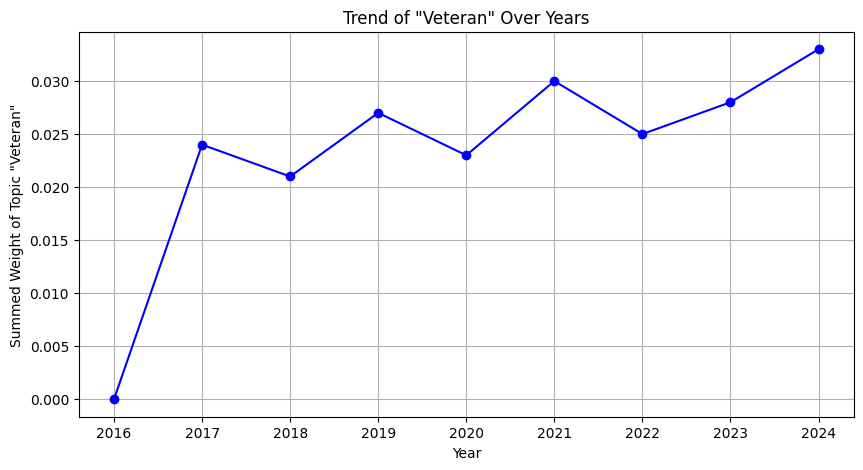

In [17]:
import matplotlib.pyplot as plt

# Plot the trend for the word "veteran"
# Filter out None values from the keys
years = sorted([year for year in topic_weights.keys() if year is not None])
veteran_trends = [topic_weights[year].get('veteran', 0) for year in years]  # Get weights for "veteran", default to 0 if not found

plt.figure(figsize=(10, 5))
plt.plot(years, veteran_trends, marker='o', linestyle='-', color='b')
plt.title('Trend of "Veteran" Over Years')
plt.xlabel('Year')
plt.ylabel('Summed Weight of Topic "Veteran"')
plt.grid(True)
plt.show()

Analysis of Telehealth Over Time

In [18]:
# Define telehealth-related terms
telehealth_terms = ['telehealth', 'telemedicine', 'remote care', 'digital health', 'e-health']

# Aggregate weights for telehealth-related terms by year
telehealth_weights = {}

for year, model in lda_models_by_year.items():
    topics = model.print_topics(num_words=10)  # Ensure to cover all relevant terms in the topics
    telehealth_weights[year] = sum(
        weight for _, words in topics
        for weight, word in (word_weight.split('*') for word_weight in words.split('+'))
        if word.strip('" ') in telehealth_terms
    )



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


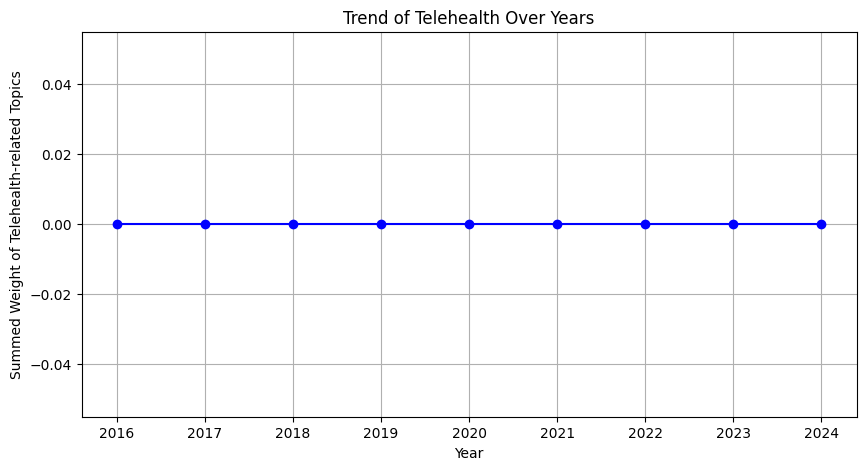

In [20]:
import matplotlib.pyplot as plt

# Filter out None values from telehealth_weights keys before sorting
years = sorted([year for year in telehealth_weights.keys() if year is not None])
values = [telehealth_weights[year] for year in years]

plt.figure(figsize=(10, 5))
plt.plot(years, values, marker='o', linestyle='-', color='blue')
plt.title('Trend of Telehealth Over Years')
plt.xlabel('Year')
plt.ylabel('Summed Weight of Telehealth-related Topics')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


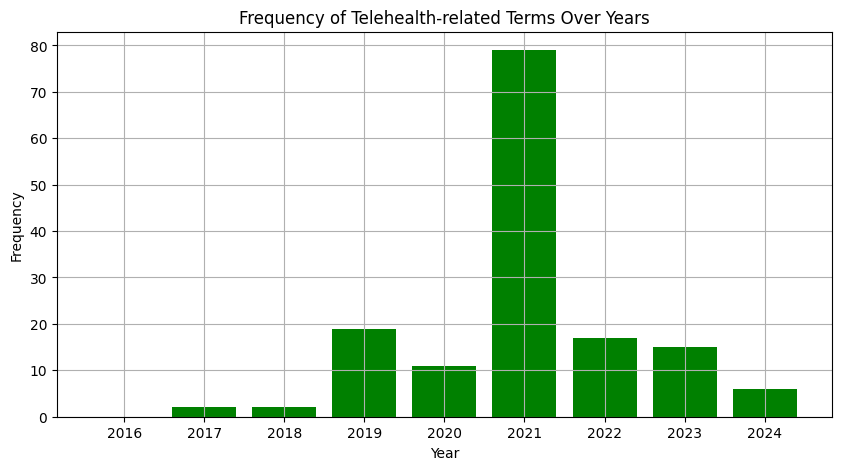

In [23]:
from collections import defaultdict, Counter

# Create a dictionary to store documents by year
documents_by_year = defaultdict(list)

for year, text in texts_with_dates:
    if year:  # Check if year is not None
        documents_by_year[year].append(text)

# Calculate frequency of telehealth-related terms per year
telehealth_freq = {}
for year, docs in documents_by_year.items():
    year_counter = Counter()
    for doc in docs:
        words = doc.split()  # Assuming docs are already tokenized appropriately
        year_counter.update(words)
    telehealth_freq[year] = sum(year_counter.get(term, 0) for term in telehealth_terms)

# Plot the frequencies
years = sorted(telehealth_freq.keys())
values = [telehealth_freq[year] for year in years]

plt.figure(figsize=(10, 5))
plt.bar(years, values, color='green')
plt.title('Frequency of Telehealth-related Terms Over Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Sentiment Analysis of Telehealth Over Years

In [24]:
telehealth_sentences_by_year = {}

for year, docs in documents_by_year.items():
    telehealth_sentences_by_year[year] = []
    for doc in docs:
        sentences = doc.split('. ')  # Split text into sentences
        for sentence in sentences:
            if any(term in sentence.lower() for term in telehealth_terms):
                telehealth_sentences_by_year[year].append(sentence)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
!pip install nltk


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from statistics import mean

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for telehealth-related sentences
sentiment_scores_by_year = {}

for year, sentences in telehealth_sentences_by_year.items():
    sentiments = [sid.polarity_scores(sentence)['compound'] for sentence in sentences]
    if sentiments:
        sentiment_scores_by_year[year] = mean(sentiments)  # Average sentiment score
    else:
        sentiment_scores_by_year[year] = 0  # Default to neutral if no sentences


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


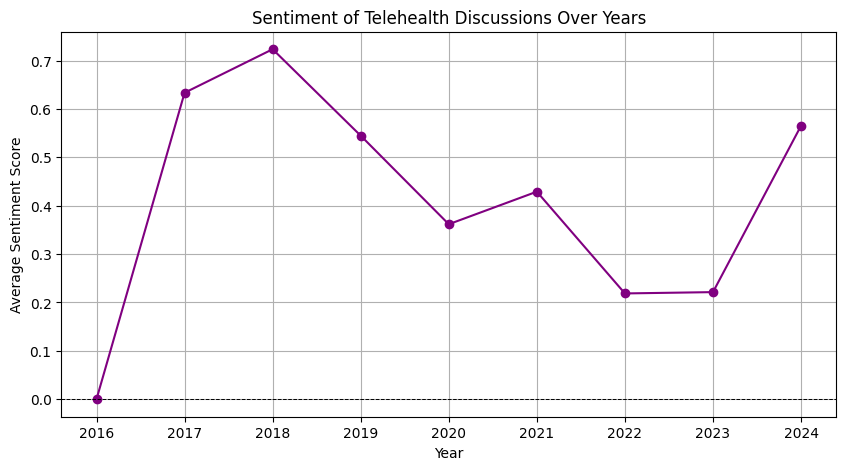

In [27]:
import matplotlib.pyplot as plt

years = sorted(sentiment_scores_by_year.keys())
scores = [sentiment_scores_by_year[year] for year in years]

plt.figure(figsize=(10, 5))
plt.plot(years, scores, marker='o', linestyle='-', color='purple')
plt.title('Sentiment of Telehealth Discussions Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)  # Neutral sentiment line
plt.show()


In [ ]:
from google.colab import drive
drive.flush_and_unmount()